In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
def fun(I, num_bins=128):
    # Crear el objeto SIFT
    sift = cv.SIFT_create()

    # Detectar keypoints y calcular descriptores
    keypoints, descriptores = sift.detectAndCompute(I, None)
    img_keypoints = cv.drawKeypoints(I, keypoints, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Mostrar la imagen con los puntos clave
    plt.figure(figsize=(8, 8))
    plt.imshow(cv.cvtColor(img_keypoints, cv.COLOR_BGR2RGB))
    plt.title('Imagen con puntos clave SIFT')
    plt.axis('off')  # Omitir los ejes
    plt.show()

    num_keypoints = len(keypoints)
    print(f'Número de keypoints detectados: {num_keypoints}')

    if descriptores is not None:
        # Aplanar los descriptores en una sola dimensión (1D)
        descriptores = descriptores.flatten()

        total_valores = len(descriptores)
        print(f'Total de valores en los descriptores: {total_valores}')

        # Normalizar los descriptores al rango [0, 1]
        descriptores_normalizados = (descriptores - descriptores.min()) / (descriptores.max() - descriptores.min())

        # Crear el histograma con 'num_bins' bins y en el rango de 0 a 1
        hist, _ = np.histogram(descriptores_normalizados, bins=num_bins, range=(0, 1))

        # Normalizar el histograma para que sume 1
        hist = hist.astype('float32')
        hist /= hist.sum()  # Normaliza a la suma 1

        # Graficar el histograma
        plt.figure(figsize=(8, 6))
        plt.plot(range(num_bins), hist)
        plt.title('Histograma de los descriptores SIFT normalizados')
        plt.xlabel('Bin')
        plt.ylabel('Frecuencia normalizada')
        plt.show()

        # Retornar el histograma normalizado
        return hist, num_keypoints, total_valores
    else:
        # Si no hay descriptores, retornar un vector de ceros
        return np.zeros(num_bins, dtype='float32')

In [ ]:
I = cv.imread('lenna.png',0)

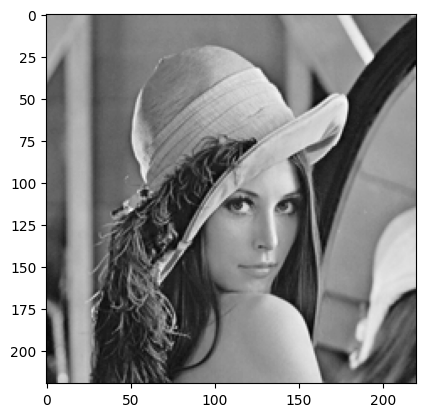

In [ ]:
plt.imshow(I,cmap='gray')

In [ ]:
hist, num_keypoints, total_valores = fun(I)

In [ ]:
hist

array([2.99768507e-01, 9.94646996e-02, 3.41435187e-02, 5.38556129e-02,
       4.12688069e-02, 1.85185187e-02, 3.19733806e-02, 1.52994795e-02,
       2.55714692e-02, 2.31843162e-02, 1.00549767e-02, 1.69270840e-02,
       8.42737313e-03, 1.67100690e-02, 1.67100690e-02, 6.79976866e-03,
       1.39250578e-02, 6.18489599e-03, 1.06698498e-02, 1.12485532e-02,
       5.24450233e-03, 1.09592015e-02, 9.76562500e-03, 4.23177099e-03,
       8.53587966e-03, 4.66579851e-03, 7.48697901e-03, 7.41464132e-03,
       3.29137733e-03, 6.51041651e-03, 3.00202542e-03, 6.79976866e-03,
       6.04021968e-03, 2.49565975e-03, 4.62962966e-03, 2.60416674e-03,
       5.78703685e-03, 4.48495382e-03, 2.20630784e-03, 4.41261567e-03,
       1.91695604e-03, 4.08709468e-03, 3.94241884e-03, 1.48292829e-03,
       3.61689809e-03, 3.21903941e-03, 1.69994216e-03, 3.47222225e-03,
       1.73611112e-03, 3.18287034e-03, 3.07436334e-03, 1.73611112e-03,
       2.53182859e-03, 1.33825233e-03, 2.89351842e-03, 3.32754641e-03,
      

In [ ]:
num_keypoints

216

In [ ]:
total_valores

27648

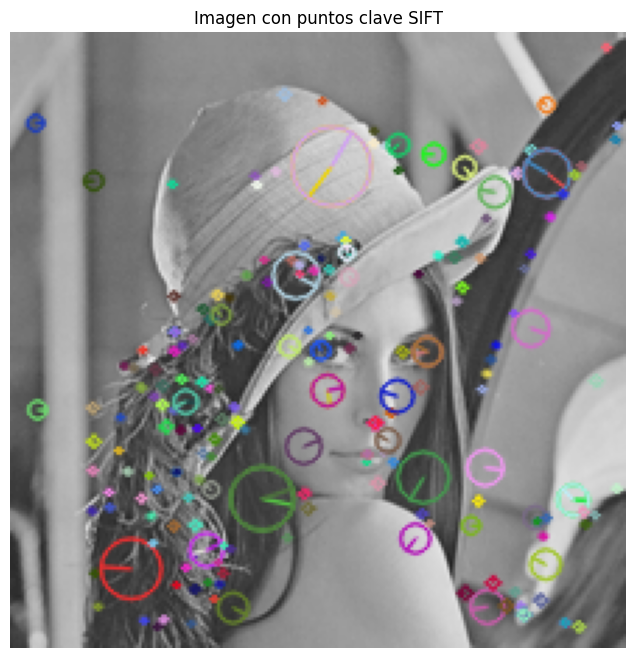

Número de keypoints detectados: 216
Total de valores en los descriptores: 27648


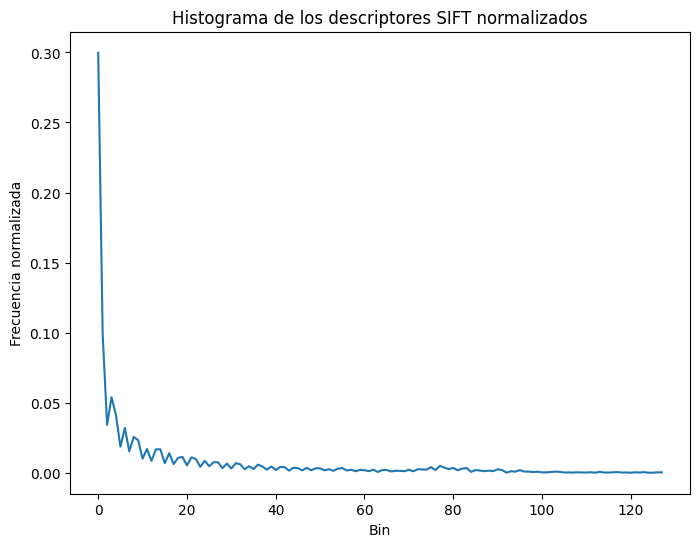

In [ ]:
hist, num_keypoints, total_valores = fun(I)
